In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt



In [8]:
# defining the canny detector function

# here weak_th and strong_th are thresholds for
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
	
	# conversion of image to grayscale
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	
	# Noise reduction step
	img = cv2.GaussianBlur(img, (5, 5), 1.4)
	
	# Calculating the gradients
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
	
	# Conversion of Cartesian coordinates to polar
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
	# setting the minimum and maximum thresholds
	# for double thresholding
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image
	height, width = img.shape
	
	# Looping through every pixel of the grayscale
	# image
	for i_x in range(width):
		for i_y in range(height):
			
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			# selecting the neighbours of the target pixel
			# according to the gradient direction
			# In the x axis direction
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# top right (diagonal-1) direction
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Non-maximum suppression step
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
	# double thresholding step
	for i_x in range(width):
		for i_y in range(height):
			
			grad_mag = mag[i_y, i_x]
			
			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of
	# gradients of edges
	return mag



<Figure size 432x288 with 0 Axes>

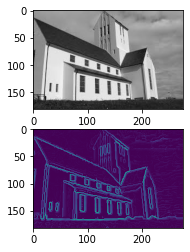

In [7]:
frame = cv2.imread('image1.jfif')

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)


In [2]:
from skimage.io import imread
from skimage.color import rgb2gray

img = imread('image1.jfif')
imggray = rgb2gray(img)

In [3]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

New

Image successfully read...
Finding Corners...


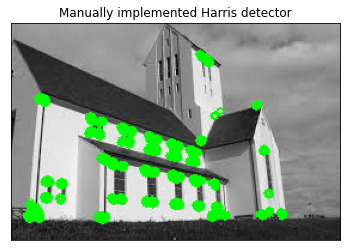

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def my_harris(img_dir,window_size,k,threshold):

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    # Check if the image is exists
    if img is None:
        print('Invalid image:' + img_dir)
        return None
    else:
        print('Image successfully read...')
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img,(x,y),3,(0,255,0))
                
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()

my_harris("image1.jfif", 5, 0.04, 0.30) # Change this path to one that will lead to your image

New Approach 2(B)


In [9]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gkernel(l=3, sig=2):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [11]:
img = cv2.imread('image1.jfif') # Reading Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converting Image to grayscale
g_kernel = gkernel(3,2) # Create gaussian kernel with 3x3(odd) size and sigma equals to 2
print("Gaussian Filter: ",g_kernel) # show the kernel array
dst = cv2.filter2D(gray,-1,g_kernel) #convolve kernel with image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR(opencv format) to RGB format
#dst = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert BGR(opencv format) to RGB format

Gaussian Filter:  [[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]


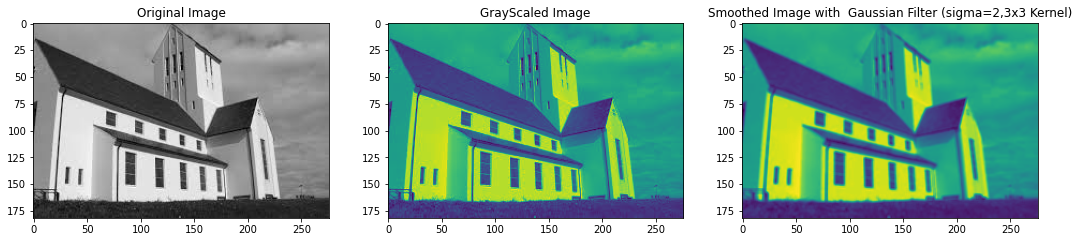

In [12]:
plt.figure(figsize=(18, 18))
plt.subplot(131),plt.imshow(img),plt.title('Original Image') # visualize and give title
plt.subplot(132),plt.imshow(gray),plt.title('GrayScaled Image')
plt.subplot(133),plt.imshow(dst),plt.title('Smoothed Image with  Gaussian Filter (sigma=2,3x3 Kernel)')
plt.show()


#Main Start From Here

In [13]:
def gaussianKernel2(size, sigma, twoDimensional=True):
    """
    Creates a gaussian kernel with given sigma and size, 3rd argument is for choose the kernel as 1d or 2d
    """
    if twoDimensional:
        kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
    else:
        kernel = np.fromfunction(lambda x: math.e ** ((-1*(x-(size-1)/2)**2) / (2*sigma**2)), (size,))
    return kernel / np.sum(kernel)

In [15]:
img = cv2.imread('image1.jfif') # Reading Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_kernel_x = gaussianKernel2(3,1,False) # create a one dim gauss filter with 3 component and sigma equals to 1
print('One Dimensional Kernel(x): ',g_kernel_x) # show 1D filter(x)
g_kernel_y = g_kernel_x.reshape(-1,1) # take transpose of above kernel and obtain y filter
print('Transpose Of One Dimensional Kernel(y): ', g_kernel_y) # show 1D filter(y)
dst = cv2.filter2D(gray,-1,g_kernel_x) #convolve first 1D filter --- NOTE: cv2.filter2D method can work with 1D arrays too
dst = cv2.filter2D(dst,-1,g_kernel_y) #convolve second 1D filter --- NOTE: cv2.filter2D method can work with 1D arrays too
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert opencv format to general rgb format

One Dimensional Kernel(x):  [0.27406862 0.45186276 0.27406862]
Transpose Of One Dimensional Kernel(y):  [[0.27406862]
 [0.45186276]
 [0.27406862]]


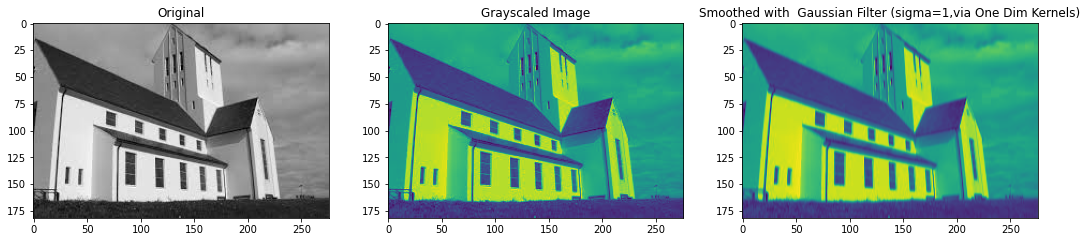

In [16]:
plt.figure(figsize=(18, 18))
plt.subplot(131),plt.imshow(img),plt.title('Original') # visualize and give title
plt.subplot(132),plt.imshow(gray),plt.title('Grayscaled Image')
plt.subplot(133),plt.imshow(dst),plt.title('Smoothed with  Gaussian Filter (sigma=1,via One Dim Kernels)') # visualize and give title
plt.show()